In [13]:
import pandas as pd
import numpy as np

In [14]:
gdp = pd.read_csv('/Users/vishaldubey/Downloads/gdp_1960_2020.csv')

In [15]:
gdp.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


In [16]:
gdp['country'].unique()

array(['the United States', 'United Kingdom', 'France', 'China', 'Japan',
       'Canada', 'Italy', 'India', 'Australia', 'Sweden', 'Brazil',
       'Turkey', 'Mexico', 'Netherlands', 'Spain', 'Belgium',
       'Switzerland', 'Venezuela', 'South Africa', 'Philippines',
       'Austria', 'Denmark', 'New Zealand', 'Finland', 'Norway', 'Greece',
       'Bangladesh', 'Iran', 'Nigeria', 'Chile', 'Columbia',
       'South Korea', 'Pakistan', 'Congo (gold)', 'Portugal', 'Thailand',
       'Algeria', 'Israel', 'Peru', 'Morocco', 'Ireland', 'Malaysia',
       'Puerto Rico', 'Iraq', 'Sri Lanka', 'Hong Kong', 'Sudan',
       'Uruguay', 'Garner', 'Zimbabwe', 'Guatemala', 'Ecuador', 'Syria',
       'Senegal', 'Kenya', 'Zambia', 'Singapore', 'Luxembourg', 'Jamaica',
       'Madagascar', 'Dominica', 'Cambodia', 'Cameroon', 'Bolivia',
       "C ô te d'Ivoire", 'Afghanistan', 'Panama', 'Trinidad and Tobago',
       'Nepal', 'Costa Rica', 'Niger', 'Uganda', 'Honduras',
       'Burkina Faso', 'Sierra Leo

In [ ]:
#We want to do predict the gdp for India, so we will only select India from country and make it a seperate dataframe.

In [17]:
gdp_India = gdp[gdp['country'] == 'India']
gdp_India

,year,rank,country,state,gdp,gdp_percent
7,1960,8,India,Asia,37029883875,0.031931
110,1961,8,India,Asia,39232435784,0.032502
213,1962,8,India,Asia,42161481858,0.031930
317,1963,7,India,Asia,48421923458,0.034050
422,1964,7,India,Asia,56480289940,0.036255
...,...,...,...,...,...,...
9153,2016,7,India,Asia,2294797980509,0.030479
9357,2017,6,India,Asia,2651472946375,0.033085
9562,2018,7,India,Asia,2701111782774,0.031710
9764,2019,5,India,Asia,2870504096717,0.033278


In [ ]:
#Dropping the column 'rank', 'state', 'gdp_percent' as those columns holds no importance for our analysis and forecasting.

In [18]:
gdp_India.drop(['rank', 'state', 'gdp_percent'], axis = 1, inplace = True)

/Users/vishaldubey/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
gdp_India

,year,country,gdp
7,1960,India,37029883875
110,1961,India,39232435784
213,1962,India,42161481858
317,1963,India,48421923458
422,1964,India,56480289940
...,...,...,...
9153,2016,India,2294797980509
9357,2017,India,2651472946375
9562,2018,India,2701111782774
9764,2019,India,2870504096717


In [ ]:
#Visualising the GDP of India over the past years.

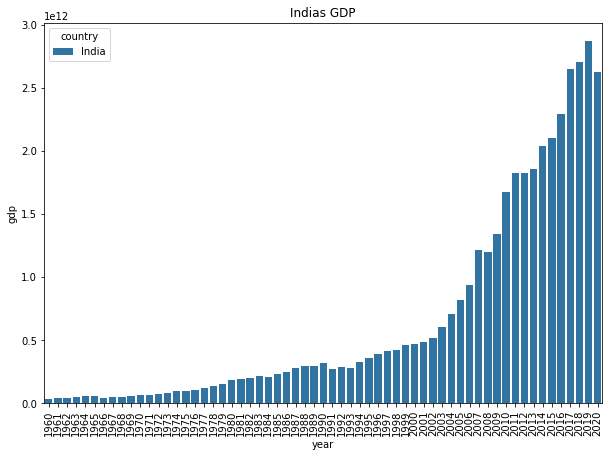

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.barplot(x = 'year', y = 'gdp', hue = 'country', data = gdp_India)
plt.xticks(rotation=90)
plt.title('Indias GDP')
plt.show()

In [ ]:
#We will train our data of India's GDP to fit and predict the future GDP 

In [30]:
x1 = gdp_India.drop(['gdp', 'country'], axis =1)
y1 = gdp_India['gdp']

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test, = train_test_split(x1, y1, test_size = 0.2)

gdp_model_India = LinearRegression()
gdp_model_India.fit(x1,y1)

LinearRegression()

In [34]:
print('Coefficient: ', gdp_model_India.coef_)
print('Intercept: ', gdp_model_India.intercept_)
pred = gdp_model_India.predict(x1)

Coefficient:  [3.87539925e+10]
Intercept:  -76462096733309.66


In [ ]:
#Plotting the predicted values and actual values of India's GDP

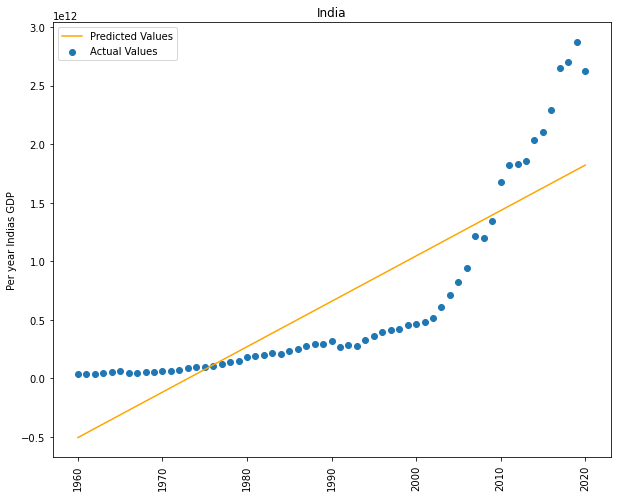

In [35]:
plt.figure(figsize =(10,8))
plt.scatter(x1, y1, label = 'Actual Values')
plt.plot(x1, pred, color='orange', label ='Predicted Values')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Per year Indias GDP')
plt.title('India')
plt.show()

In [ ]:
#We will check the prediction of future years of our model of India's GDP

In [36]:
years = [2021, 2022, 2023, 2024]
for i in years:
    print(gdp_model_India.predict([[i]]))

[1.85972215e+12]
[1.89847614e+12]
[1.93723013e+12]
[1.97598412e+12]
